<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/neural-network-course/03_keras/06_save_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zapisywanie i ładowanie wag z modelu

Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:
 - zapisanie wag po każdej epoce
 - zapisanie wag po określonej liczbie epok
 - załadowanie wag 
 - zapisanie całego modelu
 - załadowanie całego modelu

### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Zapisywanie punktów kontrolnych podczas trenowania](#a3)
5. [Załadowanie wag do modelu](#a4)
6. [Dodatkowe opcje](#a5)
7. [Ręczne zapisywanie wag](#a6)
8. [Zapisanie całego modelu](#a7)




### <a name='a0'> </a> 1. Import bibliotek

In [1]:
# ######################################################
# Etap 7. Odcinek: Zapis/Ładowanie modelu.

# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__

'2.4.1'

### <a name='a1'> </a> 2. Załadowanie danych i wstępna eksploracja

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

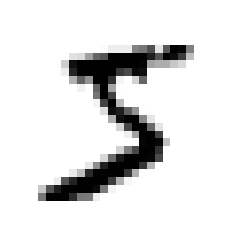

In [5]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# sami wypłaszczamy input aby nie używać warstwy Flatten
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

### <a name='a2'> </a> 3. Budowa modelu

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()
# na filmie dopiero punkt 8. Zapisanie całego modelu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### <a name='a3'> </a> 4. Zapisywanie punktów kontrolnych podczas trenowania

In [ ]:
checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 800/1000 [=======================>......] - ETA: 0s - loss: 1.2506 - accuracy: 0.6275
Epoch 00001: saving model to training/cp.ckpt
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1403 - accuracy: 0.6680 - val_loss: 0.7031 - val_accuracy: 0.7800
Epoch 2/10
 960/1000 [===========================>..] - ETA: 0s - loss: 0.4370 - accuracy: 0.8698
Epoch 00002: saving model to training/cp.ckpt
1000/1000 [==============================] - 0s 302us/sample - loss: 0.4281 - accuracy: 0.8740 - val_loss: 0.5552 - val_accuracy: 0.8340
Epoch 3/10
 928/1000 [==========================>...] - ETA: 0s - loss: 0.2843 - accuracy: 0.9289
Epoch 00003: saving model to training/cp.ckpt
1000/1000 [==============================] - 0s 296us/sample - loss: 0.2764 - accuracy: 0.9330 - val_loss: 0.5437 - val_accuracy: 0.8400
Epoch 4/10
 800/1000 [=======================>......] - ETA: 0s - loss: 0.2193 - accuracy: 0.9450
Epoch 00004: 

In [ ]:
ls -l {checkpoint_dir}

total 4784
-rw-r--r-- 1 root root      71 Nov  9 21:40 checkpoint
-rw-r--r-- 1 root root 4886700 Nov  9 21:40 cp.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:40 cp.ckpt.index


### <a name='a4'> </a> 5. Załadowanie wag do modelu

In [ ]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

1000/1 - 0s - loss: 2.4806 - accuracy: 0.1500
0.15


In [ ]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

1000/1 - 0s - loss: 0.5106 - accuracy: 0.8660
0.866


### <a name='a5'> </a> 6. Dodatkowe opcje

In [ ]:
!rm -rf ./training

In [ ]:
checkpoint_path = 'training/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              period=5,
                              verbose=1)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[cp_callback], verbose=0)


Epoch 00005: saving model to training/cp-0005.ckpt

Epoch 00010: saving model to training/cp-0010.ckpt

Epoch 00015: saving model to training/cp-0015.ckpt

Epoch 00020: saving model to training/cp-0020.ckpt

Epoch 00025: saving model to training/cp-0025.ckpt

Epoch 00030: saving model to training/cp-0030.ckpt

Epoch 00035: saving model to training/cp-0035.ckpt

Epoch 00040: saving model to training/cp-0040.ckpt

Epoch 00045: saving model to training/cp-0045.ckpt

Epoch 00050: saving model to training/cp-0050.ckpt


In [ ]:
!ls -l ./training

total 49400
-rw-r--r-- 1 root root      81 Nov  9 21:43 checkpoint
-rw-r--r-- 1 root root 1628741 Nov  9 21:42 cp-0000.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     402 Nov  9 21:42 cp-0000.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:42 cp-0005.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:42 cp-0005.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:43 cp-0010.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:43 cp-0010.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:43 cp-0015.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:43 cp-0015.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:43 cp-0020.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:43 cp-0020.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:43 cp-0025.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Nov  9 21:43 cp-0025.ckpt.index
-rw-r--r-- 1 root root 4886700 Nov  9 21:43 cp-0030.ckpt.data-00000-of-00001
-rw-r--r-- 1 roo

In [ ]:
import tensorflow as tf

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training/cp-0050.ckpt'

In [ ]:
model = create_model()
model.load_weights(latest)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

1000/1 - 0s - loss: 0.5142 - accuracy: 0.8790
0.879


### <a name='a6'> </a> 7. Ręczne zapisywanie wag

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

1000/1 - 0s - loss: 0.5142 - accuracy: 0.8790
0.879


In [ ]:
!ls -l checkpoints/

total 4780
-rw-r--r-- 1 root root      83 Nov  9 21:44 checkpoint
-rw-r--r-- 1 root root 4886173 Nov  9 21:44 my_checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root     944 Nov  9 21:44 my_checkpoint.index


### <a name='a7'> </a> 8. Zapisanie całego modelu

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 2.2964 - accuracy: 0.1549
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 2.2625 - accuracy: 0.4263
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 2.2105 - accuracy: 0.5326
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 2.1231 - accuracy: 0.5305
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 2.0148 - accuracy: 0.5225


In [11]:
# nazwa modelu z rozszerzeniem h5
model.save('my_model.h5')

In [12]:
from tensorflow.keras.models import load_model

# z powrotem załaduje model z pliku

# ścieżka dostępu do wag przypisana do new_model
new_model = load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
# to accuracy na zbiorze testowym wytrenowanego wcześniej modelu
print(acc)

32/32 - 0s - loss: 1.9686 - accuracy: 0.5310
0.531000018119812
